In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import re #etude des chaine de caractere

# Projet Anti-Spam à l'aide du jeu de message fourni par @Montaut

nettoyage des donnees  
creation jeu de test/train  
dico de fréquence  
calcul de proba

### Nettoyage de la base de données

In [2]:
input_file = "spam.csv"
default = pd.read_csv(input_file)
default.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
base = default.dropna()

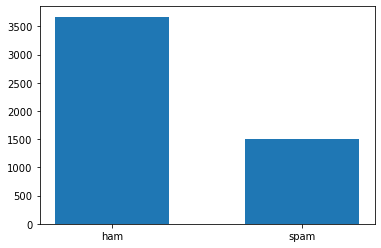

Nombres de mots différents : 50485


In [4]:
cpt_ham = 0
cpt_spam = 0
mot = set()
for i in range (base.size // 4):
    t = base.iloc[i]
    for w in (re.findall(r"[\w]+",base.iloc[i][2])):
        mot.add(w)
    if t[3] == 0:
        cpt_ham+=1
    else:
        cpt_spam+=1
x = ['ham','spam']
y = [cpt_ham,cpt_spam]

plt.bar(x,y, width = 0.6)
plt.show()
print("Nombres de mots différents :", len(mot))

In [5]:
print(mot)

{'bernardo', 'dolium', '211', 'grimstead', 'lagoon', 'gfhrqfz', 'unfriendly', 'wondering', 'hermes', 'functions', 'accompaniment', 'daffodil', 'zinck', 'minuet', 'vctfvxbn', 'mca', 'xhsz', 'swroy', 'melts', 'catcher', 'foradditionaluses', 'hjj', 'juju', 'audibly', '70171', 'vacancies', 'credentials', 'manometer', 'sauerkraut', 'erectionn', 'standardandpoors', 'mjaulh', 'octavia', 'shirts', 'immaturedirty', 'but', 'crease', 'kareem', 'number', '5848', 'wqqiees', 'embedding', '4651', 'escapescruise', 'mcf', '1910', 'franz', 'estrange', 'gdvkq', 'fastmail', '243', 'colossal', 'qrbojk', '2698', '1895', 'juzkmw', 'geraldine', 'checkpoint', 'colour', 'apr', 'garycl', 'fatty', '247676', 'faciiities', 'kyhqoor', 'betsy', 'nipsco', 'storeroom', 'come', 'crewcut', 'causate', 'reasonable', 'desperately', '105633', 'rseicsnv', 'slingshot', 'silt', '4523', 'mantissa', 'fisting', 'excluding', 'chemist', 'maake', 'hamal', 'emitting', 'sub', '048', 'branching', 'crackle', 'beige', 'hayden', '5244', 'u

On ne va garder que les colonnes "text" et "label_num" qui seront nos X et Y pour notre ia

In [6]:
datalist = base.values.tolist()
X = [ [datalist[_][2]] for _ in range(len(datalist)) ]
Y = [ [datalist[_][3]] for _ in range(len(datalist)) ]

In [7]:
print(X[0])

["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."]


In [8]:
print(re.findall(r"[\w]+",X[0][0]))

['Subject', 'enron', 'methanol', 'meter', '988291', 'this', 'is', 'a', 'follow', 'up', 'to', 'the', 'note', 'i', 'gave', 'you', 'on', 'monday', '4', '3', '00', 'preliminary', 'flow', 'data', 'provided', 'by', 'daren', 'please', 'override', 'pop', 's', 'daily', 'volume', 'presently', 'zero', 'to', 'reflect', 'daily', 'activity', 'you', 'can', 'obtain', 'from', 'gas', 'control', 'this', 'change', 'is', 'needed', 'asap', 'for', 'economics', 'purposes']


On considere nos messages comme une liste de mot

In [9]:
X = [re.findall(r"[\w]+",X[_][0]) for _ in range(len(X))]

## Creation de nos jeux d'usages

In [10]:
from sklearn.model_selection import train_test_split as ttc
X_train, X_test, Y_train, Y_test = ttc(X, Y, test_size= 0.2,random_state = 0)

## Construction du dictionnaire de mots

Dictionnaire de fréquence

In [18]:
def construction_dico_frequence(X,Y,taille_mot):
    dict_mot_frequence = dict()
    for i in range(len(X)):
        for mot in X[i]:
            if Y[i] == 0: #si c'est un ham
                if len(mot) > taille_mot: #on retire les mots de longueur
                    value = dict_mot_frequence.get(mot, None)
                    if value is not None: 
                        dict_mot_frequence[mot] = value + 1
                    else:
                        dict_mot_frequence[mot] = 1
            else:
                if len(mot) > taille_mot: #on retire les mots de longueur
                    value = dict_mot_frequence.get(mot, None)
                    if value is not None: 
                        dict_mot_frequence[mot] = value + 1
                    else:
                        dict_mot_frequence[mot] = 1
            '''#ajout des points
            if len(mot) > taille_mot: #on retire les mots de longueur
                value = dict_mot_frequence.get(mot, None)
                if value is not None: 
                    dict_mot_frequence[mot] = value + 1
                else:
                    dict_mot_frequence[mot] = 1
            '''
    return dict_mot_frequence

In [19]:
print(construction_dico_frequence(X,Y,0))

{'Subject': 5171, 'enron': 6555, 'methanol': 121, 'meter': 2459, '988291': 3, 'this': 7161, 'is': 7162, 'a': 9813, 'follow': 167, 'up': 1357, 'to': 20332, 'the': 25613, 'note': 265, 'i': 6379, 'gave': 53, 'you': 8159, 'on': 7313, 'monday': 285, '4': 1577, '3': 2922, '00': 2404, 'preliminary': 54, 'flow': 697, 'data': 257, 'provided': 164, 'by': 2997, 'daren': 1901, 'please': 3198, 'override': 6, 'pop': 38, 's': 3435, 'daily': 578, 'volume': 900, 'presently': 53, 'zero': 169, 'reflect': 93, 'activity': 293, 'can': 2021, 'obtain': 27, 'from': 4191, 'gas': 3034, 'control': 217, 'change': 735, 'needed': 231, 'asap': 71, 'for': 10505, 'economics': 18, 'purposes': 51, 'hpl': 2318, 'nom': 832, 'january': 419, '9': 949, '2001': 2028, 'see': 1200, 'attached': 1097, 'file': 684, 'hplnol': 48, '09': 860, 'xls': 1020, 'neon': 75, 'retreat': 7, 'ho': 5, 'we': 4340, 're': 1984, 'around': 150, 'that': 4767, 'most': 299, 'wonderful': 16, 'time': 994, 'of': 10167, 'year': 371, 'leaders': 27, 'know': 15